# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home diretcory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [5]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


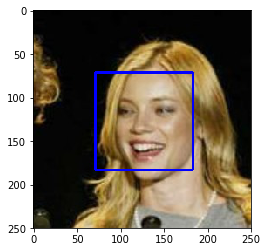

In [6]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[500])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [7]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [8]:
def assess_face_detector(h_files, d_files):
    hf_detected_faces = 0.0
    df_detected_faces = 0.0

    for i in trange(len(h_files)):
        if face_detector(h_files[i]) > 0:
             hf_detected_faces += 1
        if face_detector(d_files[i]) > 0:
            df_detected_faces += 1

    print('Human faces detected in:')
    print(f'{(hf_detected_faces/len(h_files))*100}% of human_files and {(df_detected_faces /len(h_files))*100}% of dog_files')

In [9]:
from tqdm import trange

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

assess_face_detector(human_files_short, dog_files_short)

100%|██████████| 100/100 [00:11<00:00, 10.55it/s]

Human faces detected in:
96.0% of human_files and 18.0% of dog_files


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [11]:
import torch
import torchvision.models as models

# define VGG-16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [42]:
from PIL import Image
from torchvision import transforms
from torch.autograd import Variable
import torch.nn as nn

# solves: OSError: image file is truncated (150 bytes not processed)
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    VGG16.eval()
    
    loader = transforms.Compose([transforms.Resize((224,224)),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                                                      (0.229, 0.224, 0.225))])
    image = Image.open(img_path)
    image = loader(image).float()
    # needs to  be Variable to be accepted by VGG16
    image = Variable(image)
    # makes a mini-batch of size 1
    image = image.unsqueeze(0)  
    # get predictions, squeeze it out of the 'mini-batch', and return as numpy
    prediction = VGG16(image).squeeze().data.numpy()
    # np.argmax returns the position of the largest value
    return np.argmax(prediction)

VGG16_predict('dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg')

252

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    imagenet_class = VGG16_predict(img_path)
    if imagenet_class >= 151 and imagenet_class <= 268:
        return True
    else:
        return False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [1]:
def assess_dog_detector(h_files, d_files):
    hf_detected_dogs  = 0.0
    df_detected_dogs = 0.0

    for i in trange(len(d_files)):
        if dog_detector(h_files[i]) > 0:
             hf_detected_dogs += 1
        if dog_detector(d_files[i]) > 0:
            df_detected_dogs += 1
    
    print(f'Model: vgg16')
    print('Dogs detected in:')
    print(f'{(hf_detected_dogs/len(d_files))*100}% of human_files and {(df_detected_dogs/len(d_files))*100}% in dog_files')

In [11]:
### Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

assess_dog_detector(human_files_short, dog_files_short)

100%|██████████| 100/100 [02:21<00:00,  1.37s/it]

Model: vgg16
Dogs detected in:
0.0% of human_files and 93.0% in dog_files


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [12]:
### (Optional) 
### Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

## Assess the Dog Detector with more pre-trained networks


In [5]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector_2(img_path, model, model_name):
    imagenet_class = model_predict(img_path, model, model_name)
    if imagenet_class >= 151 and imagenet_class <= 268:
        return True
    else:
        return False

In [6]:
def assess_dog_detector_2(h_files, d_files, models_dict):
    
    for model_name, model in models_dict.items():
        hf_detected_dogs  = 0.0
        df_detected_dogs = 0.0
        for i in trange(len(d_files)):
            if dog_detector_2(h_files[i], model, model_name) > 0:
                 hf_detected_dogs += 1
            if dog_detector_2(d_files[i], model, model_name) > 0:
                df_detected_dogs += 1
    
        print(f'Model: {model_name}')
        print('Dogs detected in:')
        print(f'{(hf_detected_dogs/len(d_files))*100}% of human_files and {(df_detected_dogs/len(d_files))*100}% in dog_files\n')

In [25]:
def model_predict(img_path, model, model_name):
    '''
    Use pre-trained model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to model's prediction
    '''
    
    ## Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    model.eval()
    
    if model_name == 'inception_v3':
        loader = transforms.Compose([transforms.Resize((299,299)),
                                     transforms.ToTensor()])
        model.transform_input = True
    else:
        loader = transforms.Compose([transforms.Resize((224,224)),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                                                          (0.229, 0.224, 0.225))])
        
    image = Image.open(img_path)
    image = loader(image).float()
    # needs to  be Variable to be accepted by model
    image = Variable(image)
    # makes a mini-batch of size 1
    image = image.unsqueeze(0)  
    # get predictions, squeeze it out of the 'mini-batch', and return as numpy
    prediction = model(image).squeeze().data.numpy()
    # np.argmax returns the position of the largest value
    return np.argmax(prediction)

In [16]:
# define pre-trained models
vgg16 = models.vgg16(pretrained=True)
vgg19_bn = models.vgg19_bn(pretrained=True)
alexnet = models.alexnet(pretrained=True)
resnet152 = models.resnet152(pretrained=True)
squeezenet1_1 = models.squeezenet1_1(pretrained=True)
densenet161 = models.densenet161(pretrained=True)
inception_v3 = models.inception_v3(pretrained=True)

models_dict = {'vgg16':vgg16, 'vgg19_bn':vgg19_bn, 'alexnet':alexnet, 'resnet152':resnet152,
                'squeezenet1_1':squeezenet1_1, 'densenet161':densenet161, 'inception_v3':inception_v3} 

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    vgg16 = vgg16.cuda()
    vgg19_bn = vgg19_bn.cuda()
    inception_v3 = inception_v3.cuda() 
    alexnet = alexnet.cuda() 
    resnet152 = resnet152.cuda() 
    squeezenet1_1 = squeezenet1_1.cuda() 
    densenet161 = densenet161.cuda() 
    inception_v3 = inception_v3.cuda() 

/Users/bjartesunde/anaconda3/envs/dl-p2/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/squeezenet.py:94: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
/Users/bjartesunde/anaconda3/envs/dl-p2/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/squeezenet.py:92: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
/Users/bjartesunde/anaconda3/envs/dl-p2/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.


In [17]:
human_files_short = human_files[:1000]
dog_files_short = dog_files[:1000]

assess_dog_detector_2(human_files_short, dog_files_short, models_dict)

  0%|          | 0/1000 [00:00<?, ?it/s]

Model: vgg16
Dogs detected in:
0.5% of human_files and 98.7% in dog_files



  0%|          | 0/1000 [00:00<?, ?it/s]

Model: vgg19_bn
Dogs detected in:
0.8999999999999999% of human_files and 98.5% in dog_files



  0%|          | 0/1000 [00:00<?, ?it/s]

Model: alexnet
Dogs detected in:
0.3% of human_files and 98.1% in dog_files



  0%|          | 0/1000 [00:00<?, ?it/s]

Model: resnet152
Dogs detected in:
1.0% of human_files and 98.1% in dog_files



  0%|          | 0/1000 [00:00<?, ?it/s]

Model: squeezenet1_1
Dogs detected in:
0.1% of human_files and 98.4% in dog_files



  0%|          | 0/1000 [00:00<?, ?it/s]

Model: densenet161
Dogs detected in:
0.6% of human_files and 98.8% in dog_files



100%|██████████| 1000/1000 [20:36<00:00,  1.14s/it]

Model: inception_v3
Dogs detected in:
0.5% of human_files and 98.4% in dog_files



In [28]:
# test more resnet models

human_files_short = human_files[:1000]
dog_files_short = dog_files[:1000]

# define pre-trained models
resnet18 = models.resnet18(pretrained=True)
resnet34 = models.resnet34 (pretrained=True)
resnet50 = models.resnet50(pretrained=True)
resnet101 = models.resnet101(pretrained=True)

models_dict = {'resnet18':resnet18, 'resnet34':resnet34, 'resnet50':resnet50, 'resnet101':resnet101} 

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    resnet18 = resnet18.cuda()
    resnet34 = resnet34.cuda()
    resnet50 = resnet50.cuda()
    resnet101 = resnet101.cuda()
    
human_files_short = human_files[:1000]
dog_files_short = dog_files[:1000]

assess_dog_detector_2(human_files_short, dog_files_short, models_dict)

  0%|          | 0/1000 [00:00<?, ?it/s]

Model: resnet18
Dogs detected in:
0.6% of human_files and 98.4% in dog_files



  0%|          | 0/1000 [00:00<?, ?it/s]

Model: resnet34
Dogs detected in:
0.7000000000000001% of human_files and 98.5% in dog_files



  0%|          | 0/1000 [00:00<?, ?it/s]

Model: resnet50
Dogs detected in:
0.8999999999999999% of human_files and 98.6% in dog_files



100%|██████████| 1000/1000 [27:12<00:00,  1.51s/it]

Model: resnet101
Dogs detected in:
0.8% of human_files and 98.6% in dog_files



---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | - | - 
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

### Load and Transform our Data

In [17]:
import os
import numpy as np
from torchvision import datasets, transforms
from torch import utils
import matplotlib.pyplot as plt
%matplotlib inline

## Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# define training, validation and test data directories
data_dir = 'dogImages/'
train_dir = os.path.join(data_dir, 'train/')
valid_dir = os.path.join(data_dir, 'valid/')
test_dir = os.path.join(data_dir, 'test/')

# create transforms

data_transforms = {
    'train': transforms.Compose([
    transforms.RandomAffine(10, translate=[0.1, 0.1], shear=10),
    transforms.Resize((256,256)),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(
            brightness=0.4,
            contrast=0.4,
            saturation=0.4,),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((230,230)),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize((230,230)),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# create datasets
train_data = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
valid_data = datasets.ImageFolder(valid_dir, transform=data_transforms['val'])
test_data = datasets.ImageFolder(test_dir, transform=data_transforms['test'])

# print out some data stats
print(f'Number of training images: {len(train_data)}')
print(f'Number of validation images: {len(valid_data)}')
print(f'Number of test images: {len(test_data)}')

Number of training images: 6680
Number of validation images: 835
Number of test images: 836


### DataLoaders and Data Visualization

In [18]:
# define dataloader parameters
batch_size = 64
num_workers= 0

# prepare data loaders

train_loader = utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
valid_loader = utils.data.DataLoader(valid_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)
test_loader = utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)

loaders_scratch = {'train':train_loader,'valid':valid_loader, 'test':test_loader}

The inspiration for the `un_normalize` function can be found in this [post](https://discuss.pytorch.org/t/simple-way-to-inverse-transform-normalization/4821/3).

In [19]:
def un_normalize(tensors, mean, std):
    for tensor in tensors:
        for t, m, s in zip(tensor, mean, std):
            t.mul_(s).add_(m)
    return tensors

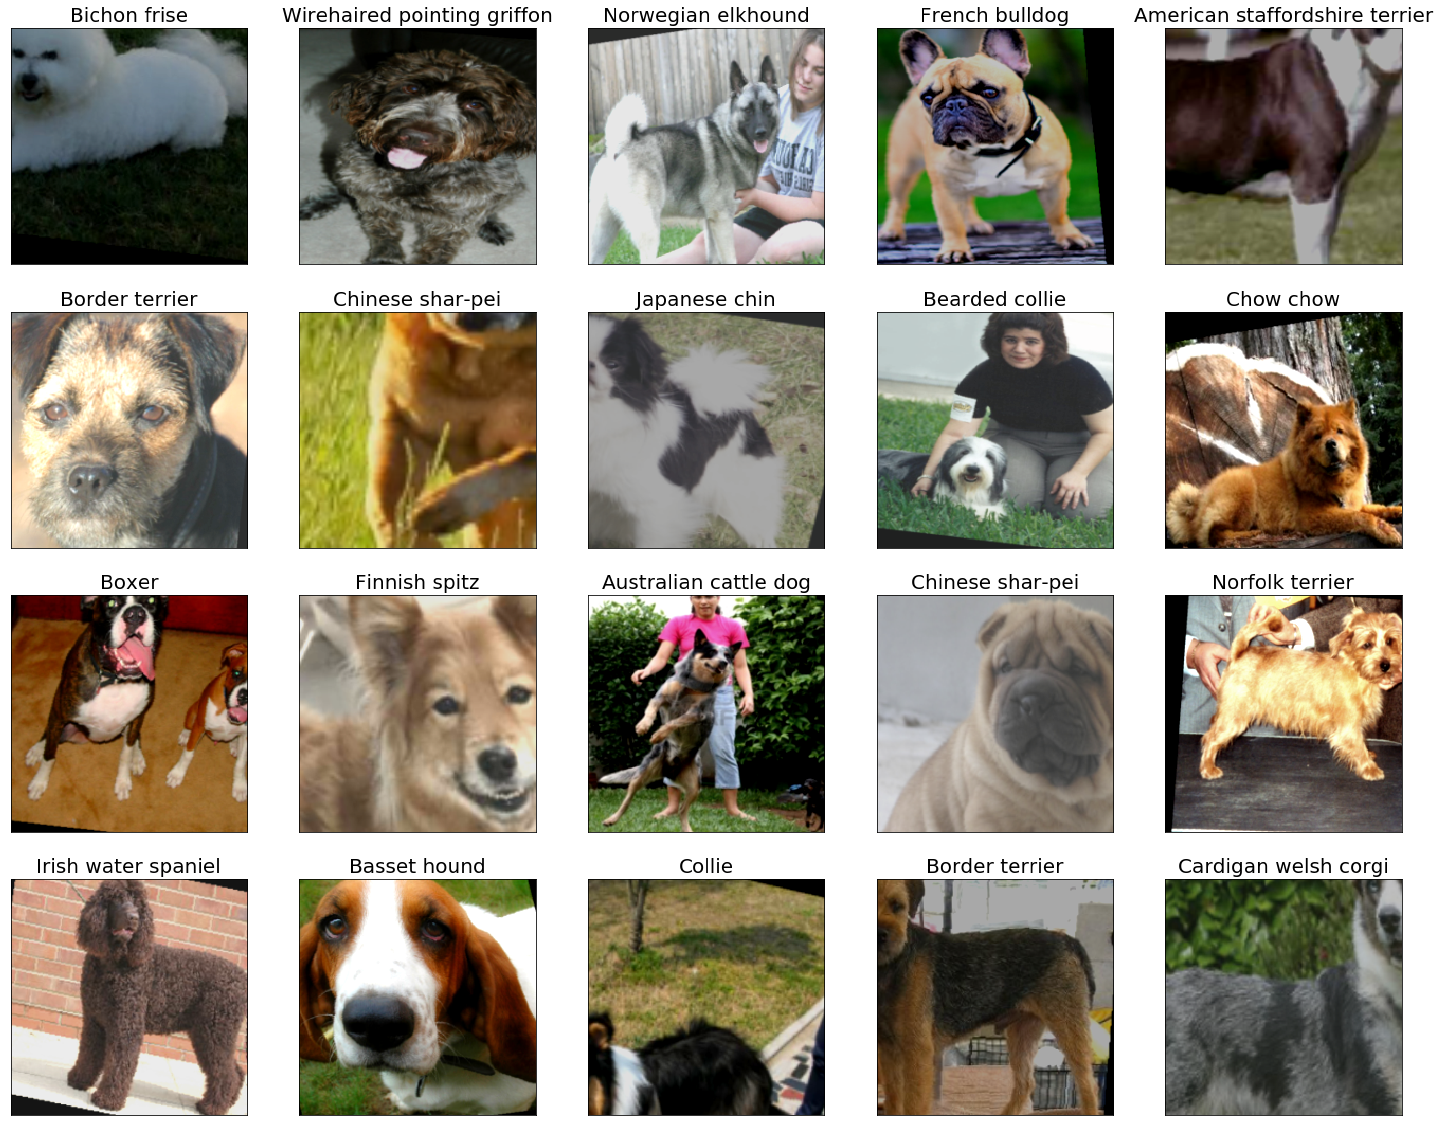

In [20]:
# Visualize some sample data

# obtain one batch
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = un_normalize(images,mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
images = images.numpy() # convert from tesnor to numpy for disply

# get class names
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 20))
for idx in np.arange(20):
    ax = fig.add_subplot(4, 10/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(class_names[int(labels[idx])],fontsize=20)

In [21]:
print(f'Number of dog breeds: {len(train_data.classes)}')

Number of dog breeds: 133


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:  First we use ```RandomAffine(10, translate=[0.1, 0.1], shear=10)``` which rotates the image by $\pm$10 degrees, translate it horizontal and vertical by a fraction (0.1,0.1), and shear it by $\pm$10 degrees. Then we resize the image to (256,256) using ```Resize((256,256))``` and then resize again to (224,224) using ```RandomResizedCrop(224)```. Then we use ```RandomHorizontalFlip``` to randomly flip the image with a probability of 0.5, and then the ```ColorJitter(brightness=0.4,contrast=0.4,saturation=0.4)``` randomly change the brightness, contrast, and saturation of the image.

The reason for first resizing the image to (256,256) is so that the```RandomResizedCrop``` has a consistent size to crop from. The images are cropped to (224,224) because this is the size the [torchvision models](https://pytorch.org/docs/stable/torchvision/models.html) expects.

We only have 6680 training images for 133 dog breeds, that only about 50 images per breed. By augmenting the dataset we can artificially increase the number of training images we have. For example, by using horizontal flip we double the number of images from 6680 to 13360. The augmentation of our images helps the network generalize to the data better and prevents overfitting.   

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [22]:
import torch.nn as nn
import torch.nn.functional as F

def conv3x3(in_planes, out_planes, stride=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)


def conv1x1(in_planes, out_planes, stride=1):
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)


class BasicBlock(nn.Module):

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out

# define the CNN architecture
class ResNet(nn.Module):
    ### choose an architecture, and complete the class
    def __init__(self, block, layers, num_classes=133):
        super(ResNet, self).__init__()
        self.inplanes = 16
        
        self.conv1 = nn.Conv2d(3, 16, kernel_size=7, stride=2, padding=3,bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        
        self.layer1 = self._make_layer(block, 16, layers[0])
        self.layer2 = self._make_layer(block, 32, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 64, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 128, layers[3], stride=2)
        
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(128, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
                
    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes, stride),
                nn.BatchNorm2d(planes),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x
    
#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = ResNet(BasicBlock, [2, 2, 2, 2])

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()
    
print(model_scratch)

ResNet(
  (conv1): Conv2d(3, 16, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ I have implemented the resnet18 architecture. My code has been heaviliy influenced by the [PyTorch implementation of resnet](https://github.com/pytorch/vision/blob/master/torchvision/models/resnet.py). I chose to implement the resnet architecture to get a deeper understanding of its design. 

Below is an image of the resnet34 architecture. 

![resnet34](images/resnet34.png)
[source](https://arxiv.org/pdf/1512.03385v1.pdf)

Below is an image of one layer in the resnet architecture. This is the same as the ```BasicBlock``` class in the code. 

![renset layer](images/basic_block.png)
[source](https://arxiv.org/pdf/1603.05027.pdf)


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [23]:
import torch.optim as optim
from torch.optim import lr_scheduler

### select loss function
criterion_scratch = nn.CrossEntropyLoss()

### select optimizer
optimizer_scratch = optim.Adam(params=model_scratch.parameters(), lr=0.001)

# reduce learning rate when a validation loss has stopped improving
plateau_lr_scheduler = lr_scheduler.ReduceLROnPlateau(optimizer_scratch, 'min',  patience=7, verbose=True)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

#### Early Stopping
Early Stopping is a form of regularization used to avoid overfitting on the training dataset. A simple implementation of Early Stopping compares the loss over the training set vs. the test set, and when the loss begin to rise on test set we stop the training. My EarlyStopping class is inspired by the [ignite EarlyStopping class](https://github.com/pytorch/ignite/blob/master/ignite/handlers/early_stopping.py), but this is a bare minimum version. The save_checkpoint function is inspired by the *save model if validation loss decrease functionality* in [udacity/deep-learning-v2-pytorch/convolutional-neural-networks/mnist-mlp/mnist_mlp_solution_with_validation.ipynb
](https://github.com/udacity/deep-learning-v2-pytorch/blob/master/convolutional-neural-networks/mnist-mlp/mnist_mlp_solution_with_validation.ipynb). It saves a checkpoint (a copy of the best model) when the validation loss is at its lowest, then we can revert to the checkpoint after early stopping.

In [24]:
class EarlyStopping:
    """Early stops the training if validation loss dosen't improve after a given patience."""
    def __init__(self,patience=5):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved. 
        """
        self.patience = patience
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
    
    def __call__(self, val_loss, model):
        
        score = -val_loss
        
        if self.best_score is None:
            self.best_score = score
        elif score < self.best_score:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0
    
    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), 'saved_models/checkpoint.pt')
        self.val_loss_min = val_loss

In [25]:
from tqdm import trange
# solves: OSError: image file is truncated (150 bytes not processed)
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path, scheduler, patience=15):
    """returns trained model"""
    early_stopping = EarlyStopping(patience=patience)
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in trange(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to the model
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss 
            train_loss +=  ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # forward pass to get net output
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update validation loss 
            valid_loss +=  ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
        
        scheduler.step(valid_loss)
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        early_stopping(valid_loss, model)
        
        if early_stopping.early_stop:
            print("Early stopping")
            break
            
    # load last checkpoint with the best model
    model.load_state_dict(torch.load('saved_models/checkpoint.pt'))
    best_vloss = -early_stopping.best_score
    torch.save(model.state_dict(), f'{save_path}_vloss{best_vloss:.5f}.pt')
    print('Finished Training')
    # return trained model
    return model

In [ ]:
# train the model
model_scratch = train(500, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'saved_models/model_scratch',
                      plateau_lr_scheduler , patience=15)


  0%|          | 1/500 [02:22<19:47:21, 142.77s/it]

Epoch: 1 	Training Loss: 4.844275 	Validation Loss: 4.797740


  0%|          | 2/500 [04:45<19:44:39, 142.73s/it]

Epoch: 2 	Training Loss: 4.646862 	Validation Loss: 4.757406
Validation loss decreased (inf --> 4.757406).  Saving model ...


  1%|          | 3/500 [07:07<19:41:28, 142.63s/it]

Epoch: 3 	Training Loss: 4.537614 	Validation Loss: 4.484524
Validation loss decreased (4.757406 --> 4.484524).  Saving model ...


  1%|          | 4/500 [09:30<19:38:21, 142.54s/it]

Epoch: 4 	Training Loss: 4.398640 	Validation Loss: 4.363810
Validation loss decreased (4.484524 --> 4.363810).  Saving model ...


  1%|          | 5/500 [11:55<19:41:56, 143.27s/it]

Epoch: 5 	Training Loss: 4.263115 	Validation Loss: 4.381573
EarlyStopping counter: 1 out of 15


  1%|          | 6/500 [14:17<19:37:52, 143.06s/it]

Epoch: 6 	Training Loss: 4.150416 	Validation Loss: 4.094526
Validation loss decreased (4.363810 --> 4.094526).  Saving model ...


  1%|▏         | 7/500 [16:40<19:33:51, 142.86s/it]

Epoch: 7 	Training Loss: 4.071740 	Validation Loss: 3.980439
Validation loss decreased (4.094526 --> 3.980439).  Saving model ...


  2%|▏         | 8/500 [19:02<19:31:14, 142.84s/it]

Epoch: 8 	Training Loss: 4.005506 	Validation Loss: 3.933424
Validation loss decreased (3.980439 --> 3.933424).  Saving model ...


  2%|▏         | 9/500 [21:24<19:26:45, 142.58s/it]

Epoch: 9 	Training Loss: 3.928690 	Validation Loss: 3.963938
EarlyStopping counter: 1 out of 15


  2%|▏         | 10/500 [23:46<19:21:23, 142.21s/it]

Epoch: 10 	Training Loss: 3.845531 	Validation Loss: 3.746034
Validation loss decreased (3.933424 --> 3.746034).  Saving model ...


  2%|▏         | 11/500 [26:07<19:17:12, 141.99s/it]

Epoch: 11 	Training Loss: 3.796743 	Validation Loss: 4.044894
EarlyStopping counter: 1 out of 15


  2%|▏         | 12/500 [28:29<19:14:50, 141.99s/it]

Epoch: 12 	Training Loss: 3.698500 	Validation Loss: 3.964472
EarlyStopping counter: 2 out of 15


  3%|▎         | 13/500 [30:51<19:11:58, 141.93s/it]

Epoch: 13 	Training Loss: 3.670861 	Validation Loss: 3.604843
Validation loss decreased (3.746034 --> 3.604843).  Saving model ...


  3%|▎         | 14/500 [33:12<19:08:17, 141.76s/it]

Epoch: 14 	Training Loss: 3.605207 	Validation Loss: 3.723567
EarlyStopping counter: 1 out of 15


  3%|▎         | 15/500 [35:34<19:05:58, 141.77s/it]

Epoch: 15 	Training Loss: 3.566711 	Validation Loss: 4.206956
EarlyStopping counter: 2 out of 15


  3%|▎         | 16/500 [37:55<19:02:00, 141.57s/it]

Epoch: 16 	Training Loss: 3.523432 	Validation Loss: 3.613614
EarlyStopping counter: 3 out of 15


  3%|▎         | 17/500 [40:17<19:00:10, 141.64s/it]

Epoch: 17 	Training Loss: 3.429006 	Validation Loss: 3.469149
Validation loss decreased (3.604843 --> 3.469149).  Saving model ...


  4%|▎         | 18/500 [42:38<18:56:48, 141.51s/it]

Epoch: 18 	Training Loss: 3.369961 	Validation Loss: 3.363556
Validation loss decreased (3.469149 --> 3.363556).  Saving model ...


  4%|▍         | 19/500 [45:00<18:54:13, 141.48s/it]

Epoch: 19 	Training Loss: 3.322805 	Validation Loss: 3.487205
EarlyStopping counter: 1 out of 15


  4%|▍         | 20/500 [47:21<18:50:39, 141.33s/it]

Epoch: 20 	Training Loss: 3.250906 	Validation Loss: 3.442067
EarlyStopping counter: 2 out of 15


  4%|▍         | 21/500 [49:42<18:47:28, 141.23s/it]

Epoch: 21 	Training Loss: 3.220543 	Validation Loss: 3.330364
Validation loss decreased (3.363556 --> 3.330364).  Saving model ...


  4%|▍         | 22/500 [52:03<18:45:11, 141.24s/it]

Epoch: 22 	Training Loss: 3.172342 	Validation Loss: 3.118906
Validation loss decreased (3.330364 --> 3.118906).  Saving model ...


  5%|▍         | 23/500 [54:24<18:42:43, 141.22s/it]

Epoch: 23 	Training Loss: 3.134860 	Validation Loss: 3.254106
EarlyStopping counter: 1 out of 15


  5%|▍         | 24/500 [56:45<18:39:45, 141.15s/it]

Epoch: 24 	Training Loss: 3.055154 	Validation Loss: 3.093504
Validation loss decreased (3.118906 --> 3.093504).  Saving model ...


  5%|▌         | 25/500 [59:06<18:36:08, 140.99s/it]

Epoch: 25 	Training Loss: 3.016025 	Validation Loss: 3.379845
EarlyStopping counter: 1 out of 15


  5%|▌         | 26/500 [1:01:26<18:33:13, 140.91s/it]

Epoch: 26 	Training Loss: 2.999753 	Validation Loss: 3.205662
EarlyStopping counter: 2 out of 15


  5%|▌         | 27/500 [1:03:48<18:31:25, 140.98s/it]

Epoch: 27 	Training Loss: 2.886347 	Validation Loss: 3.374582
EarlyStopping counter: 3 out of 15


  6%|▌         | 28/500 [1:06:09<18:29:40, 141.06s/it]

Epoch: 28 	Training Loss: 2.845029 	Validation Loss: 3.302513
EarlyStopping counter: 4 out of 15


  6%|▌         | 29/500 [1:08:30<18:27:18, 141.06s/it]

Epoch: 29 	Training Loss: 2.835167 	Validation Loss: 3.194884
EarlyStopping counter: 5 out of 15


  6%|▌         | 30/500 [1:10:52<18:26:41, 141.28s/it]

Epoch: 30 	Training Loss: 2.803319 	Validation Loss: 2.709967
Validation loss decreased (3.093504 --> 2.709967).  Saving model ...


  6%|▌         | 31/500 [1:13:13<18:23:37, 141.19s/it]

Epoch: 31 	Training Loss: 2.749793 	Validation Loss: 2.745940
EarlyStopping counter: 1 out of 15


  6%|▋         | 32/500 [1:15:33<18:20:19, 141.07s/it]

Epoch: 32 	Training Loss: 2.702979 	Validation Loss: 2.795566
EarlyStopping counter: 2 out of 15


  7%|▋         | 33/500 [1:17:54<18:17:54, 141.06s/it]

Epoch: 33 	Training Loss: 2.621326 	Validation Loss: 2.918742
EarlyStopping counter: 3 out of 15


  7%|▋         | 34/500 [1:20:16<18:15:55, 141.11s/it]

Epoch: 34 	Training Loss: 2.598381 	Validation Loss: 2.928805
EarlyStopping counter: 4 out of 15


  7%|▋         | 35/500 [1:22:37<18:14:25, 141.22s/it]

Epoch: 35 	Training Loss: 2.562501 	Validation Loss: 2.784069
EarlyStopping counter: 5 out of 15


  7%|▋         | 36/500 [1:24:59<18:14:23, 141.52s/it]

Epoch: 36 	Training Loss: 2.519061 	Validation Loss: 2.637808
Validation loss decreased (2.709967 --> 2.637808).  Saving model ...


  7%|▋         | 37/500 [1:27:21<18:12:46, 141.61s/it]

Epoch: 37 	Training Loss: 2.493639 	Validation Loss: 2.519329
Validation loss decreased (2.637808 --> 2.519329).  Saving model ...


  8%|▊         | 38/500 [1:29:44<18:12:23, 141.87s/it]

Epoch: 38 	Training Loss: 2.455341 	Validation Loss: 2.659348
EarlyStopping counter: 1 out of 15


  8%|▊         | 39/500 [1:32:05<18:09:58, 141.86s/it]

Epoch: 39 	Training Loss: 2.398531 	Validation Loss: 2.432872
Validation loss decreased (2.519329 --> 2.432872).  Saving model ...


  8%|▊         | 40/500 [1:34:28<18:08:37, 141.99s/it]

Epoch: 40 	Training Loss: 2.398974 	Validation Loss: 2.505685
EarlyStopping counter: 1 out of 15


  8%|▊         | 41/500 [1:36:50<18:06:21, 142.01s/it]

Epoch: 41 	Training Loss: 2.347060 	Validation Loss: 2.347086
Validation loss decreased (2.432872 --> 2.347086).  Saving model ...


  8%|▊         | 42/500 [1:39:12<18:03:36, 141.96s/it]

Epoch: 42 	Training Loss: 2.366801 	Validation Loss: 2.399559
EarlyStopping counter: 1 out of 15


  9%|▊         | 43/500 [1:41:33<18:00:40, 141.88s/it]

Epoch: 43 	Training Loss: 2.292874 	Validation Loss: 2.529310
EarlyStopping counter: 2 out of 15


  9%|▉         | 44/500 [1:43:55<17:58:36, 141.92s/it]

Epoch: 44 	Training Loss: 2.282084 	Validation Loss: 2.433986
EarlyStopping counter: 3 out of 15


  9%|▉         | 45/500 [1:46:17<17:54:53, 141.74s/it]

Epoch: 45 	Training Loss: 2.266535 	Validation Loss: 2.495890
EarlyStopping counter: 4 out of 15


  9%|▉         | 46/500 [1:48:38<17:52:02, 141.68s/it]

Epoch: 46 	Training Loss: 2.218239 	Validation Loss: 2.452501
EarlyStopping counter: 5 out of 15


  9%|▉         | 47/500 [1:51:00<17:49:43, 141.69s/it]

Epoch: 47 	Training Loss: 2.218994 	Validation Loss: 2.330733
Validation loss decreased (2.347086 --> 2.330733).  Saving model ...


 10%|▉         | 48/500 [1:53:22<17:47:31, 141.71s/it]

Epoch: 48 	Training Loss: 2.149273 	Validation Loss: 2.204180
Validation loss decreased (2.330733 --> 2.204180).  Saving model ...


 10%|▉         | 49/500 [1:55:44<17:45:41, 141.78s/it]

Epoch: 49 	Training Loss: 2.127031 	Validation Loss: 2.291483
EarlyStopping counter: 1 out of 15


 10%|█         | 50/500 [1:58:06<17:43:50, 141.85s/it]

Epoch: 50 	Training Loss: 2.086905 	Validation Loss: 2.266419
EarlyStopping counter: 2 out of 15


 10%|█         | 51/500 [2:00:28<17:42:42, 142.01s/it]

Epoch: 51 	Training Loss: 2.082968 	Validation Loss: 2.718443
EarlyStopping counter: 3 out of 15


 10%|█         | 52/500 [2:02:50<17:41:14, 142.13s/it]

Epoch: 52 	Training Loss: 2.027699 	Validation Loss: 2.361847
EarlyStopping counter: 4 out of 15


 11%|█         | 53/500 [2:05:14<17:42:23, 142.60s/it]

Epoch: 53 	Training Loss: 2.049852 	Validation Loss: 2.410954
EarlyStopping counter: 5 out of 15


 11%|█         | 54/500 [2:07:37<17:39:32, 142.54s/it]

Epoch: 54 	Training Loss: 2.021344 	Validation Loss: 2.355650
EarlyStopping counter: 6 out of 15


 11%|█         | 55/500 [2:10:01<17:42:32, 143.26s/it]

Epoch: 55 	Training Loss: 1.993202 	Validation Loss: 2.245558
EarlyStopping counter: 7 out of 15


 11%|█         | 56/500 [2:12:27<17:44:58, 143.92s/it]

Epoch    55: reducing learning rate of group 0 to 1.0000e-04.
Epoch: 56 	Training Loss: 2.002409 	Validation Loss: 2.279680
EarlyStopping counter: 8 out of 15


 11%|█▏        | 57/500 [2:14:52<17:45:51, 144.36s/it]

Epoch: 57 	Training Loss: 1.824119 	Validation Loss: 1.886138
Validation loss decreased (2.204180 --> 1.886138).  Saving model ...


 12%|█▏        | 58/500 [2:17:18<17:46:25, 144.76s/it]

Epoch: 58 	Training Loss: 1.749169 	Validation Loss: 1.816430
Validation loss decreased (1.886138 --> 1.816430).  Saving model ...


 12%|█▏        | 59/500 [2:19:43<17:45:23, 144.95s/it]

Epoch: 59 	Training Loss: 1.704208 	Validation Loss: 1.717725
Validation loss decreased (1.816430 --> 1.717725).  Saving model ...


 12%|█▏        | 60/500 [2:22:09<17:44:42, 145.19s/it]

Epoch: 60 	Training Loss: 1.718763 	Validation Loss: 1.789253
EarlyStopping counter: 1 out of 15


 12%|█▏        | 61/500 [2:24:34<17:41:47, 145.12s/it]

Epoch: 61 	Training Loss: 1.713813 	Validation Loss: 1.762257
EarlyStopping counter: 2 out of 15


 12%|█▏        | 62/500 [2:26:59<17:39:35, 145.15s/it]

Epoch: 62 	Training Loss: 1.678021 	Validation Loss: 1.772616
EarlyStopping counter: 3 out of 15


 13%|█▎        | 63/500 [2:29:24<17:36:13, 145.02s/it]

Epoch: 63 	Training Loss: 1.692931 	Validation Loss: 1.726679
EarlyStopping counter: 4 out of 15


 13%|█▎        | 64/500 [2:31:50<17:35:32, 145.26s/it]

Epoch: 64 	Training Loss: 1.669637 	Validation Loss: 1.677412
Validation loss decreased (1.717725 --> 1.677412).  Saving model ...


 13%|█▎        | 65/500 [2:34:15<17:32:48, 145.21s/it]

Epoch: 65 	Training Loss: 1.669996 	Validation Loss: 1.680354
EarlyStopping counter: 1 out of 15


 13%|█▎        | 66/500 [2:36:40<17:30:04, 145.17s/it]

Epoch: 66 	Training Loss: 1.680192 	Validation Loss: 1.964611
EarlyStopping counter: 2 out of 15


 13%|█▎        | 67/500 [2:39:05<17:27:11, 145.11s/it]

Epoch: 67 	Training Loss: 1.678214 	Validation Loss: 1.678803
EarlyStopping counter: 3 out of 15


 14%|█▎        | 68/500 [2:41:30<17:24:19, 145.05s/it]

Epoch: 68 	Training Loss: 1.647559 	Validation Loss: 1.923282
EarlyStopping counter: 4 out of 15


 14%|█▍        | 69/500 [2:43:55<17:22:39, 145.15s/it]

Epoch: 69 	Training Loss: 1.691656 	Validation Loss: 1.774641
EarlyStopping counter: 5 out of 15


 14%|█▍        | 70/500 [2:46:20<17:19:59, 145.11s/it]

Epoch: 70 	Training Loss: 1.640406 	Validation Loss: 1.695348
EarlyStopping counter: 6 out of 15


 14%|█▍        | 71/500 [2:48:45<17:17:40, 145.13s/it]

Epoch: 71 	Training Loss: 1.663636 	Validation Loss: 1.693518
EarlyStopping counter: 7 out of 15


 14%|█▍        | 72/500 [2:51:10<17:14:31, 145.03s/it]

Epoch    71: reducing learning rate of group 0 to 1.0000e-05.
Epoch: 72 	Training Loss: 1.606495 	Validation Loss: 1.851382
EarlyStopping counter: 8 out of 15


 15%|█▍        | 73/500 [2:53:36<17:12:59, 145.15s/it]

Epoch: 73 	Training Loss: 1.579062 	Validation Loss: 1.671275
Validation loss decreased (1.677412 --> 1.671275).  Saving model ...


 15%|█▍        | 74/500 [2:56:01<17:11:08, 145.23s/it]

Epoch: 74 	Training Loss: 1.592502 	Validation Loss: 1.681328
EarlyStopping counter: 1 out of 15


 15%|█▌        | 75/500 [2:58:27<17:09:34, 145.35s/it]

Epoch: 75 	Training Loss: 1.598158 	Validation Loss: 1.718538
EarlyStopping counter: 2 out of 15


 15%|█▌        | 76/500 [3:00:52<17:07:49, 145.45s/it]

Epoch: 76 	Training Loss: 1.610187 	Validation Loss: 1.939025
EarlyStopping counter: 3 out of 15


 15%|█▌        | 77/500 [3:03:18<17:04:45, 145.35s/it]

Epoch: 77 	Training Loss: 1.586445 	Validation Loss: 1.701919
EarlyStopping counter: 4 out of 15


In [28]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('saved_models/model_scratch_vloss1.53573.pt',map_location='cpu'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [29]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [30]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 1.559492


Test Accuracy: 58% (490/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [31]:
## Specify data loaders

# define dataloader parameters
batch_size = 64
num_workers= 0

# prepare data loaders

train_loader = utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
valid_loader = utils.data.DataLoader(valid_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)
test_loader = utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)

loaders_transfer = {'train':train_loader,'valid':valid_loader, 'test':test_loader}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [32]:
import torchvision.models as models
import torch.nn as nn

class squeezenet(nn.Module):
    def __init__(self):
        super(squeezenet, self).__init__()
        self.num_classes = 133
        squeezenet1_1 = models.squeezenet1_1(pretrained=True).features
        # freeze training for all layers
        for param in squeezenet1_1.parameters():
            param.requires_grad_(False)
                    
        modules = list(squeezenet1_1.children()) 
        
        self.features = nn.Sequential(*modules)
       
        self.classifier =  nn.Sequential(
            nn.Dropout(0.1),
            nn.Conv2d(512, self.num_classes, kernel_size=(1, 1), stride=(1, 1)),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=13, stride=1, padding=0))
                       
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x.view(x.size(0), self.num_classes)

## Specify model architecture 
model_transfer = squeezenet()

if use_cuda:
    model_transfer = model_transfer.cuda()

/Users/bjartesunde/anaconda3/envs/dl-p2/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/squeezenet.py:94: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
/Users/bjartesunde/anaconda3/envs/dl-p2/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/squeezenet.py:92: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ I have chosen the ```squeezenet1_1``` as our pre-trained model due to its good performance both in speed and accuracy when detecting dogs in images as shown in our assessment earlier. The only thing I change from the original squeezenet is ```Conv2d(512, 1000, kernel_size=(1, 1), stride=(1, 1))``` to ```nn.Conv2d(512, 133, kernel_size=(1, 1), stride=(1, 1))```, where the number of classes are different, and in the forward function where the output is reshaped to match the number of classes ```return x.view(x.size(0), 133)```. I also freeze all the layers in ```self.features```, only the layers in ```self.classifier``` will be trained. My reasoning for this is that since our dataset is so small we risk overfitting our feature extractor to the dataset, and since the ```squeezenet1_1``` is already pre-trained on ImageNet, which contains dog breeds, the feature extractor should already be reasonably good for our dataset.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [33]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(params=model_transfer.classifier.parameters())
# reduce learning rate when a validation loss has stopped improving
plateau_lr_scheduler = lr_scheduler.ReduceLROnPlateau(optimizer_transfer, 'min',  patience=7, verbose=True)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [21]:
# train the model
model_transfer =  train(500, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'saved_models/model_transfer.pt', plateau_lr_scheduler)

  0%|          | 1/500 [02:41<22:26:11, 161.87s/it]

Epoch: 1 	Training Loss: 4.045375 	Validation Loss: 2.340522


  0%|          | 2/500 [05:07<21:43:30, 157.05s/it]

Epoch: 2 	Training Loss: 2.456270 	Validation Loss: 1.615530
Validation loss decreased (inf --> 1.615530).  Saving model ...


  1%|          | 3/500 [07:34<21:14:28, 153.86s/it]

Epoch: 3 	Training Loss: 1.919949 	Validation Loss: 1.249880
Validation loss decreased (1.615530 --> 1.249880).  Saving model ...


  1%|          | 4/500 [09:57<20:46:56, 150.84s/it]

Epoch: 4 	Training Loss: 1.692225 	Validation Loss: 1.163115
Validation loss decreased (1.249880 --> 1.163115).  Saving model ...


  1%|          | 5/500 [12:20<20:25:01, 148.49s/it]

Epoch: 5 	Training Loss: 1.558697 	Validation Loss: 1.082704
Validation loss decreased (1.163115 --> 1.082704).  Saving model ...


  1%|          | 6/500 [14:45<20:13:03, 147.33s/it]

Epoch: 6 	Training Loss: 1.476089 	Validation Loss: 1.147016
EarlyStopping counter: 1 out of 15


  1%|▏         | 7/500 [17:09<20:03:25, 146.46s/it]

Epoch: 7 	Training Loss: 1.387946 	Validation Loss: 0.982945
Validation loss decreased (1.082704 --> 0.982945).  Saving model ...


  2%|▏         | 8/500 [19:34<19:56:57, 145.97s/it]

Epoch: 8 	Training Loss: 1.339668 	Validation Loss: 1.053699
EarlyStopping counter: 1 out of 15


  2%|▏         | 9/500 [22:00<19:54:29, 145.97s/it]

Epoch: 9 	Training Loss: 1.268138 	Validation Loss: 1.110370
EarlyStopping counter: 2 out of 15


  2%|▏         | 10/500 [24:27<19:54:04, 146.21s/it]

Epoch: 10 	Training Loss: 1.265874 	Validation Loss: 1.006588
EarlyStopping counter: 3 out of 15


  2%|▏         | 11/500 [26:53<19:51:00, 146.14s/it]

Epoch: 11 	Training Loss: 1.221204 	Validation Loss: 0.908618
Validation loss decreased (0.982945 --> 0.908618).  Saving model ...


  2%|▏         | 12/500 [29:20<19:49:46, 146.28s/it]

Epoch: 12 	Training Loss: 1.181750 	Validation Loss: 0.994878
EarlyStopping counter: 1 out of 15


  3%|▎         | 13/500 [31:45<19:45:39, 146.08s/it]

Epoch: 13 	Training Loss: 1.120554 	Validation Loss: 1.093870
EarlyStopping counter: 2 out of 15


  3%|▎         | 14/500 [34:11<19:41:29, 145.86s/it]

Epoch: 14 	Training Loss: 1.127108 	Validation Loss: 1.031720
EarlyStopping counter: 3 out of 15


  3%|▎         | 15/500 [36:36<19:38:54, 145.84s/it]

Epoch: 15 	Training Loss: 1.093292 	Validation Loss: 0.978980
EarlyStopping counter: 4 out of 15


  3%|▎         | 16/500 [39:00<19:30:46, 145.14s/it]

Epoch: 16 	Training Loss: 1.095318 	Validation Loss: 0.959808
EarlyStopping counter: 5 out of 15


  3%|▎         | 17/500 [41:26<19:30:08, 145.36s/it]

Epoch: 17 	Training Loss: 1.113039 	Validation Loss: 1.056580
EarlyStopping counter: 6 out of 15


  4%|▎         | 18/500 [43:52<19:30:43, 145.73s/it]

Epoch: 18 	Training Loss: 1.039592 	Validation Loss: 1.012614
EarlyStopping counter: 7 out of 15


  4%|▍         | 19/500 [46:19<19:29:38, 145.90s/it]

Epoch    18: reducing learning rate of group 0 to 1.0000e-04.
Epoch: 19 	Training Loss: 1.079439 	Validation Loss: 1.126602
EarlyStopping counter: 8 out of 15


  4%|▍         | 20/500 [48:45<19:28:04, 146.01s/it]

Epoch: 20 	Training Loss: 0.901978 	Validation Loss: 0.858900
Validation loss decreased (0.908618 --> 0.858900).  Saving model ...


  4%|▍         | 21/500 [51:11<19:24:57, 145.92s/it]

Epoch: 21 	Training Loss: 0.885328 	Validation Loss: 1.013427
EarlyStopping counter: 1 out of 15


  4%|▍         | 22/500 [53:37<19:23:00, 145.99s/it]

Epoch: 22 	Training Loss: 0.868985 	Validation Loss: 0.893032
EarlyStopping counter: 2 out of 15


  5%|▍         | 23/500 [56:03<19:21:22, 146.08s/it]

Epoch: 23 	Training Loss: 0.874344 	Validation Loss: 0.844904
Validation loss decreased (0.858900 --> 0.844904).  Saving model ...


  5%|▍         | 24/500 [58:29<19:18:34, 146.04s/it]

Epoch: 24 	Training Loss: 0.888061 	Validation Loss: 0.863206
EarlyStopping counter: 1 out of 15


  5%|▌         | 25/500 [1:00:55<19:16:26, 146.08s/it]

Epoch: 25 	Training Loss: 0.873784 	Validation Loss: 0.867369
EarlyStopping counter: 2 out of 15


  5%|▌         | 26/500 [1:03:20<19:10:58, 145.69s/it]

Epoch: 26 	Training Loss: 0.865822 	Validation Loss: 0.866116
EarlyStopping counter: 3 out of 15


  5%|▌         | 27/500 [1:05:44<19:03:58, 145.11s/it]

Epoch: 27 	Training Loss: 0.851137 	Validation Loss: 0.957410
EarlyStopping counter: 4 out of 15


  6%|▌         | 28/500 [1:08:09<19:01:26, 145.10s/it]

Epoch: 28 	Training Loss: 0.860146 	Validation Loss: 1.071004
EarlyStopping counter: 5 out of 15


  6%|▌         | 29/500 [1:10:35<19:02:21, 145.52s/it]

Epoch: 29 	Training Loss: 0.872187 	Validation Loss: 0.911803
EarlyStopping counter: 6 out of 15


  6%|▌         | 30/500 [1:13:02<19:02:11, 145.81s/it]

Epoch: 30 	Training Loss: 0.862153 	Validation Loss: 0.892323
EarlyStopping counter: 7 out of 15


  6%|▌         | 31/500 [1:15:26<18:55:29, 145.27s/it]

Epoch    30: reducing learning rate of group 0 to 1.0000e-05.
Epoch: 31 	Training Loss: 0.843654 	Validation Loss: 0.993710
EarlyStopping counter: 8 out of 15


  6%|▋         | 32/500 [1:17:50<18:50:48, 144.98s/it]

Epoch: 32 	Training Loss: 0.839054 	Validation Loss: 0.907388
EarlyStopping counter: 9 out of 15


  7%|▋         | 33/500 [1:20:16<18:51:44, 145.41s/it]

Epoch: 33 	Training Loss: 0.802764 	Validation Loss: 0.830553
Validation loss decreased (0.844904 --> 0.830553).  Saving model ...


  7%|▋         | 34/500 [1:22:43<18:52:49, 145.86s/it]

Epoch: 34 	Training Loss: 0.817032 	Validation Loss: 0.845512
EarlyStopping counter: 1 out of 15


  7%|▋         | 35/500 [1:25:09<18:50:13, 145.84s/it]

Epoch: 35 	Training Loss: 0.835704 	Validation Loss: 0.832296
EarlyStopping counter: 2 out of 15


  7%|▋         | 36/500 [1:27:35<18:48:31, 145.93s/it]

Epoch: 36 	Training Loss: 0.856247 	Validation Loss: 0.872328
EarlyStopping counter: 3 out of 15


  7%|▋         | 37/500 [1:30:01<18:46:06, 145.93s/it]

Epoch: 37 	Training Loss: 0.843066 	Validation Loss: 0.949294
EarlyStopping counter: 4 out of 15


  8%|▊         | 38/500 [1:32:28<18:44:22, 146.02s/it]

Epoch: 38 	Training Loss: 0.804348 	Validation Loss: 0.841231
EarlyStopping counter: 5 out of 15


  8%|▊         | 39/500 [1:34:53<18:40:38, 145.85s/it]

Epoch: 39 	Training Loss: 0.806330 	Validation Loss: 0.936138
EarlyStopping counter: 6 out of 15


  8%|▊         | 40/500 [1:37:19<18:37:32, 145.77s/it]

Epoch: 40 	Training Loss: 0.832273 	Validation Loss: 0.887984
EarlyStopping counter: 7 out of 15


  8%|▊         | 41/500 [1:39:45<18:36:01, 145.88s/it]

Epoch    40: reducing learning rate of group 0 to 1.0000e-06.
Epoch: 41 	Training Loss: 0.834195 	Validation Loss: 0.832739
EarlyStopping counter: 8 out of 15


  8%|▊         | 42/500 [1:42:12<18:36:33, 146.27s/it]

Epoch: 42 	Training Loss: 0.830813 	Validation Loss: 0.888104
EarlyStopping counter: 9 out of 15


  9%|▊         | 43/500 [1:44:38<18:33:38, 146.21s/it]

Epoch: 43 	Training Loss: 0.859208 	Validation Loss: 1.050930
EarlyStopping counter: 10 out of 15


  9%|▉         | 44/500 [1:47:05<18:32:52, 146.43s/it]

Epoch: 44 	Training Loss: 0.846420 	Validation Loss: 0.840901
EarlyStopping counter: 11 out of 15


  9%|▉         | 45/500 [1:49:32<18:30:54, 146.49s/it]

Epoch: 45 	Training Loss: 0.824618 	Validation Loss: 0.897405
EarlyStopping counter: 12 out of 15


  9%|▉         | 46/500 [1:51:58<18:28:24, 146.49s/it]

Epoch: 46 	Training Loss: 0.827305 	Validation Loss: 0.840686
EarlyStopping counter: 13 out of 15


  9%|▉         | 47/500 [1:54:24<18:25:54, 146.48s/it]

Epoch: 47 	Training Loss: 0.830401 	Validation Loss: 0.843301
EarlyStopping counter: 14 out of 15
Epoch: 48 	Training Loss: 0.823166 	Validation Loss: 1.076672
EarlyStopping counter: 15 out of 15
Early stopping
Finished Training


In [34]:
# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('saved_models/model_transfer.pt_vloss0.83055.pt', map_location='cpu'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [35]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.030661


Test Accuracy: 73% (613/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [44]:
### Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
# get class names
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    model_transfer.eval()
    
    loader = transforms.Compose([transforms.Resize((224,224)),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                                                      (0.229, 0.224, 0.225))])
    image = Image.open(img_path)
    image = loader(image).float()
    # needs to  be Variable to be accepted by model
    image = Variable(image)
    # makes a mini-batch of size 1
    image = image.unsqueeze(0)  
    # get predictions, squeeze it out of the 'mini-batch', and return as numpy
    prediction = model_transfer(image).squeeze().data.numpy()
    # np.argmax returns the position of the largest value
    
    return class_names[np.argmax(prediction)]

predict_breed_transfer('dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg')

'Affenpinscher'

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [ ]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

In [ ]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)